Coefficients: 
 [[0.00477014]]
Mean squared error: 0.85
Coefficient of determination: 0.68
0.681495738987177
With a rain fall(mm) of [1400] The model predicts that you will get a yield(Q/acre) of [[11.82551419]]


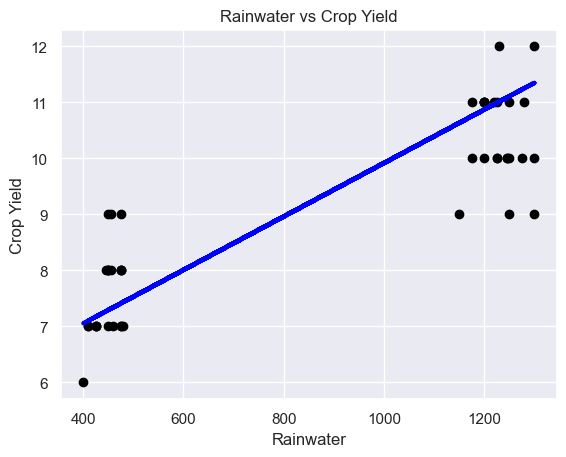

In [2]:
import pandas as pd
import sklearn as sk
import matplotlib as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crop.csv')
df=df.dropna()

# Code for Linear Regression Only One


rainfall_X = df['Rain Fall (mm)'].to_numpy()
yield_y = df['Yeild (Q/acre)'].to_numpy()

length = len(df.index)

rainfall_X = rainfall_X.reshape(length,-1)
yield_y = yield_y.reshape(length,-1)


rainfall_X_train = rainfall_X[:-45] #468 entries
rainfall_X_test = rainfall_X[-45:]  #300 entries

yield_y_train = yield_y[:-45] 
yield_y_test = yield_y[-45:]

RegGluOut = linear_model.LinearRegression()
RegGluOut.fit(rainfall_X_train, yield_y_train)

RegGluOut_y_pred = RegGluOut.predict(rainfall_X_test)

# The coefficients
print("Coefficients: \n", RegGluOut.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(yield_y_test, RegGluOut_y_pred)) # Smaller better
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(yield_y_test, RegGluOut_y_pred)) #closer to one better
print(RegGluOut.score(rainfall_X_test,yield_y_test))
#Example Data and Prediction
ExampleRain = [1400]
ExpectedOutcome = RegGluOut.predict([ExampleRain])
print("With a rain fall(mm) of "+str(ExampleRain)+" The model predicts that you will get a yield(Q/acre) of "+str(ExpectedOutcome))
# Plot outputs
plt.scatter(rainfall_X_test, yield_y_test, color="black")

plt.plot(rainfall_X_test, RegGluOut_y_pred, color="blue", linewidth=3)

plt.title('Rainwater vs Crop Yield')
plt.xlabel('Rainwater')
plt.ylabel('Crop Yield')

plt.show()






mean_squared_error :  0.8228918671107234
mean_absolute_error :  0.723965600597294
Coefficient: [0.00305778 0.05480037]
Intercept: 2.809832098560735
Coefficient of determination: 0.77
    Rain Fall (mm)  Fertilizer
0           1230.0        80.0
1            480.0        60.0
2           1250.0        75.0
3            450.0        65.0
4           1200.0        80.0
..             ...         ...
94          1250.0        77.0
95           425.0        60.0
96          1220.0        79.0
97           480.0        65.0
98          1230.0        80.0

[99 rows x 2 columns]
0.7953023764204179 score for whole data
0.7744815224117994 score for test data
[13.2998298] is the predicted yield when there is 1280mm of rainfall with 120 fertilizer and 30 degree celcius of temperature


c:\Users\Luigi T. Francisco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


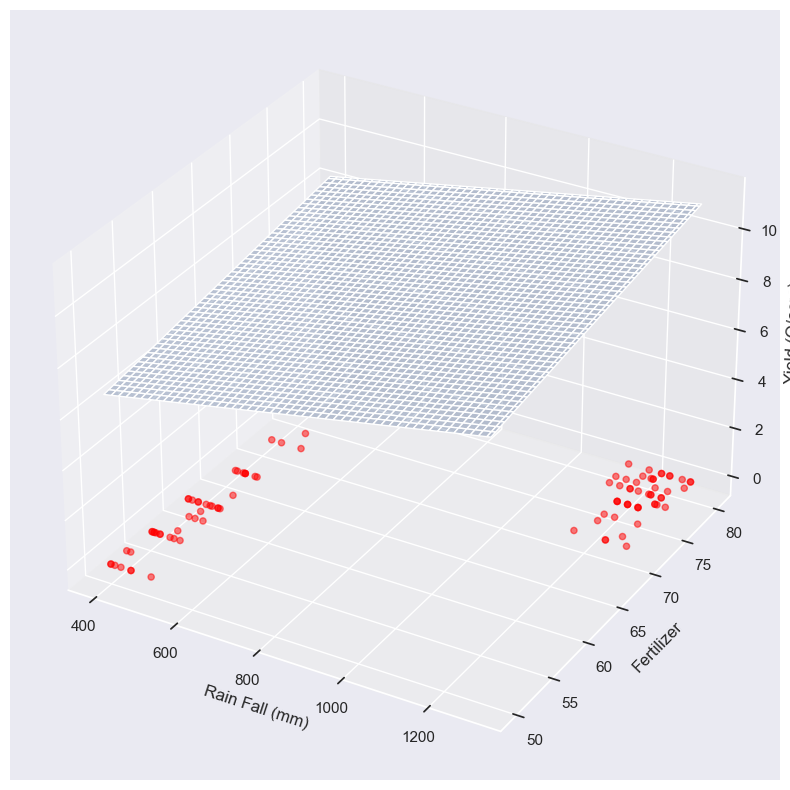

In [3]:
from sklearn.model_selection import train_test_split 
import seaborn as sns
sns.set_theme()
df2 = pd.read_csv('crop.csv')
df2 = df2.dropna()

df2['Temperatue'] = pd.to_numeric(df["Temperatue"])
Xmulti = df2.drop(['Yeild (Q/acre)','Nitrogen (N)','Phosphorus (P)','Potassium (K)','Temperatue'],axis=1)
ymulti = df2['Yeild (Q/acre)']

Multi_X_Train,Multi_X_Test,Multi_y_Train,Multi_y_Test = train_test_split(Xmulti,ymulti,test_size=0.3,random_state=101)
ML_model = linear_model.LinearRegression()
ML_model.fit(Multi_X_Train,Multi_y_Train)
ML_predictions = ML_model.predict(Multi_X_Test) 
print( 
  'mean_squared_error : ', mean_squared_error(Multi_y_Test, ML_predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(Multi_y_Test, ML_predictions)) 
print(f'Coefficient: {ML_model.coef_}')
print(f'Intercept: {ML_model.intercept_}')
print("Coefficient of determination: %.2f" % r2_score(Multi_y_Test, ML_predictions)) #closer to one better
print(Xmulti)


print(str(ML_model.score(Xmulti, ymulti)) + " score for whole data")
print(str(ML_model.score(Multi_X_Test, Multi_y_Test)) + " score for test data")

predictYield=ML_model.predict([[1280, 120]])
print(str(predictYield)+ " is the predicted yield when there is 1280mm of rainfall with 120 fertilizer and 30 degree celcius of temperature")

xMulti1, xMulti2 = np.meshgrid(np.linspace(df2['Rain Fall (mm)'].min(),df2['Rain Fall (mm)'].max(),100),
                                        np.linspace(df2['Fertilizer'].min(),df2['Fertilizer'].max(),100)                 
                                        )
multiOnlyX = pd.DataFrame({'Rain Fall (mm)':xMulti1.ravel(),
                           'Fertilizer':xMulti2.ravel()})

fittedY =ML_model.predict(multiOnlyX)

fittedY=np.array(fittedY)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
### Set figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Rain Fall (mm)'],df2['Fertilizer'],c='red', marker='o', alpha=0.5)
ax.plot_surface(xMulti1,xMulti2,fittedY.reshape(xMulti1.shape), color='b', alpha=0.3)
ax.set_xlabel('Rain Fall (mm)')
ax.set_ylabel('Fertilizer')
ax.set_zlabel('Yield (Q/acre)')
plt.show()

In [4]:
print(df2['rain'].values)

KeyError: 'rain'

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


In [ ]:
salarydf = pd.read_csv('salary.csv')
salarydf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


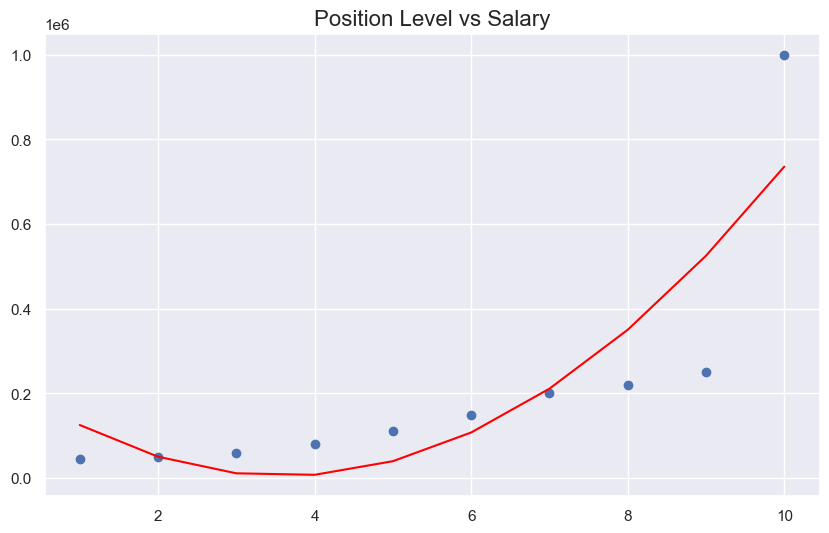

Coefficient: [[-128401.51515152   17840.90909091]]
Intercept: [235833.33333333]
0.7491335768382544is the score for its own data set
[[982166.66666667]] is the predicted salary of a person with a level 11 Position in the company


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
salarydf = pd.read_csv('salary.csv')
salarydf.info()
xLevel = salarydf['Level '].to_numpy()
ySalary = salarydf['Salary'].to_numpy()

ySalary = ySalary.reshape(-1,1)
poly_features = poly.fit_transform(xLevel.reshape(-1,1))
poly_reg_model = linear_model.LinearRegression()
poly_reg_model=poly_reg_model.fit(poly_features,ySalary)
y_predicted = poly_reg_model.predict(poly_features)


plt.figure(figsize=(10,6))
plt.title("Position Level vs Salary",size=16)
plt.scatter(xLevel,ySalary)
plt.plot(xLevel,y_predicted,c="red")
plt.show()
print(f'Coefficient: {poly_reg_model.coef_}')
print(f'Intercept: {poly_reg_model.intercept_}')
print(str(poly_reg_model.score(poly_features,ySalary))+ "is the score for its own data set")
Level = 11
polyPred = poly_reg_model.predict([[Level,Level*Level]])
print(str(polyPred) +" is the predicted salary of a person with a level "+ str(Level) +" Position in the company")

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

df = pd.read_csv('diabetes.csv')

xDia = df.drop('Outcome',axis=1)
yDia= df['Outcome']
Xdia_train, Xdia_test, ydia_train, ydia_test = train_test_split(xDia, yDia, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(Xdia_train, ydia_train)
ydia_pred = rf.predict(Xdia_test)
accuracy = accuracy_score(ydia_test, ydia_pred)
print("Accuracy:", accuracy)
ExampleData = [0,120,80,29,0,33.6,0.1,50]
PredictedOut=rf.predict([ExampleData])
print("Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age \n with values of "+str(ExampleData))
if PredictedOut ==1:
    print("Patient with this data is expected to have diabetes")
else:
    print("Patient with this data is expected to have no diabetes")



Accuracy: 0.7922077922077922
Pregnancy,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age 
 with values of [0, 120, 80, 29, 0, 33.6, 0.1, 50]
Patient with this data is expected to have no diabetes


c:\Users\Luigi T. Francisco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      99 non-null     object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()
df2 = pd.read_csv('crop.csv')
df2 = df2.dropna()

Xmulti = df2.drop(['Yeild (Q/acre)','Nitrogen (N)','Phosphorus (P)','Potassium (K)'],axis=1)
ymulti = df2['Yeild (Q/acre)']

Multi_X_Train,Multi_X_Test,Multi_y_Train,Multi_y_Test = train_test_split(Xmulti,ymulti,test_size=0.3,random_state=101)
ML_model = linear_model.LinearRegression()
ML_model.fit(Multi_X_Train,Multi_y_Train)
ML_predictions = ML_model.predict(Multi_X_Test)
print(
  'mean_squared_error : ', mean_squared_error(Multi_y_Test, ML_predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(Multi_y_Test, ML_predictions))
print(f'Coefficient: {ML_model.coef_}')
print(f'Intercept: {ML_model.intercept_}')
print(Xmulti)


print(str(ML_model.score(Xmulti, ymulti)) + " score for whole data")
print(str(ML_model.score(Multi_X_Test, Multi_y_Test)) + " score for test data")

predictYield=ML_model.predict([[1280, 120,30]])
print(str(predictYield)+ " is the predicted yield when there is 1280mm of rainfall with 120 fertilizer and 30 degree celcius of temperature")

g = sns.lmplot(
    data=df2,
x="Rain Fall (mm)", y="Yeild (Q/acre)",hue="Fertilizer")